Video 13.1
https://www.youtube.com/watch?v=kIGHE7Cfe1s

Video 13.2
https://www.youtube.com/watch?v=Rm9bJcDd1KU

Video 13.3
https://youtu.be/6HjZk-3LsjE

In [1]:
from keras.callbacks import TensorBoard
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
xtrain.shape, xtest.shape

Using TensorFlow backend.


((60000, 784), (10000, 784))

In [2]:

# this is the size of our encoded representations
encoding_dim = 4  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
x = input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)


# "decoded" is the lossy reconstruction of the input
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

# create the decoder model
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

In [3]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [4]:
autoencoder.fit(xtrain, xtrain,
                epochs=200,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest),
                callbacks=[TensorBoard(log_dir=r'C:/Users/cbroker1/AppData/Local/Temp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 8s 138us/step - loss: 0.3640 - val_loss: 0.2634
Epoch 2/200
60000/60000 [==============================] - 6s 108us/step - loss: 0.2558 - val_loss: 0.2460
Epoch 3/200
60000/60000 [==============================] - 7s 109us/step - loss: 0.2415 - val_loss: 0.2381
Epoch 4/200
60000/60000 [==============================] - 6s 107us/step - loss: 0.2368 - val_loss: 0.2348
Epoch 5/200
60000/60000 [==============================] - 6s 107us/step - loss: 0.2316 - val_loss: 0.2253
Epoch 6/200
60000/60000 [==============================] - 6s 103us/step - loss: 0.2227 - val_loss: 0.2195
Epoch 7/200
60000/60000 [==============================] - 5s 82us/step - loss: 0.2184 - val_loss: 0.2165
Epoch 8/200
60000/60000 [==============================] - 5s 82us/step - loss: 0.2157 - val_loss: 0.2138
Epoch 9/200
60000/60000 [==============================] - 5s 85us/step - loss: 0.2132 - val_los

60000/60000 [==============================] - 5s 84us/step - loss: 0.1724 - val_loss: 0.1732
Epoch 77/200
60000/60000 [==============================] - 7s 116us/step - loss: 0.1721 - val_loss: 0.1735
Epoch 78/200
60000/60000 [==============================] - 5s 86us/step - loss: 0.1717 - val_loss: 0.1729
Epoch 79/200
60000/60000 [==============================] - 5s 91us/step - loss: 0.1711 - val_loss: 0.1719
Epoch 80/200
60000/60000 [==============================] - 8s 131us/step - loss: 0.1704 - val_loss: 0.1710
Epoch 81/200
60000/60000 [==============================] - 8s 135us/step - loss: 0.1696 - val_loss: 0.1712- loss: 0.
Epoch 82/200
60000/60000 [==============================] - 8s 129us/step - loss: 0.1687 - val_loss: 0.1716
Epoch 83/200
60000/60000 [==============================] - 8s 128us/step - loss: 0.1681 - val_loss: 0.1683
Epoch 84/200
60000/60000 [==============================] - 7s 124us/step - loss: 0.1672 - val_loss: 0.1677
Epoch 85/200
60000/60000 [========

60000/60000 [==============================] - 5s 90us/step - loss: 0.1523 - val_loss: 0.1540
Epoch 152/200
60000/60000 [==============================] - 6s 92us/step - loss: 0.1522 - val_loss: 0.1552
Epoch 153/200
60000/60000 [==============================] - 6s 95us/step - loss: 0.1522 - val_loss: 0.1538
Epoch 154/200
60000/60000 [==============================] - 6s 95us/step - loss: 0.1521 - val_loss: 0.1538
Epoch 155/200
60000/60000 [==============================] - 6s 93us/step - loss: 0.1520 - val_loss: 0.1552
Epoch 156/200
60000/60000 [==============================] - 5s 82us/step - loss: 0.1519 - val_loss: 0.1535
Epoch 157/200
60000/60000 [==============================] - 6s 101us/step - loss: 0.1518 - val_loss: 0.1532
Epoch 158/200
60000/60000 [==============================] - 5s 86us/step - loss: 0.1517 - val_loss: 0.1538
Epoch 159/200
60000/60000 [==============================] - 6s 92us/step - loss: 0.1516 - val_loss: 0.1529
Epoch 160/200
60000/60000 [==============

In [ ]:
encoded_imgs

In [ ]:
noise = np.random.normal(20,4, (4,4))
noise_preds = decoder.predict(noise)

In [ ]:
plt.imshow(noise_preds[1].reshape(28,28))

In [ ]:
np.max(encoded_imgs)

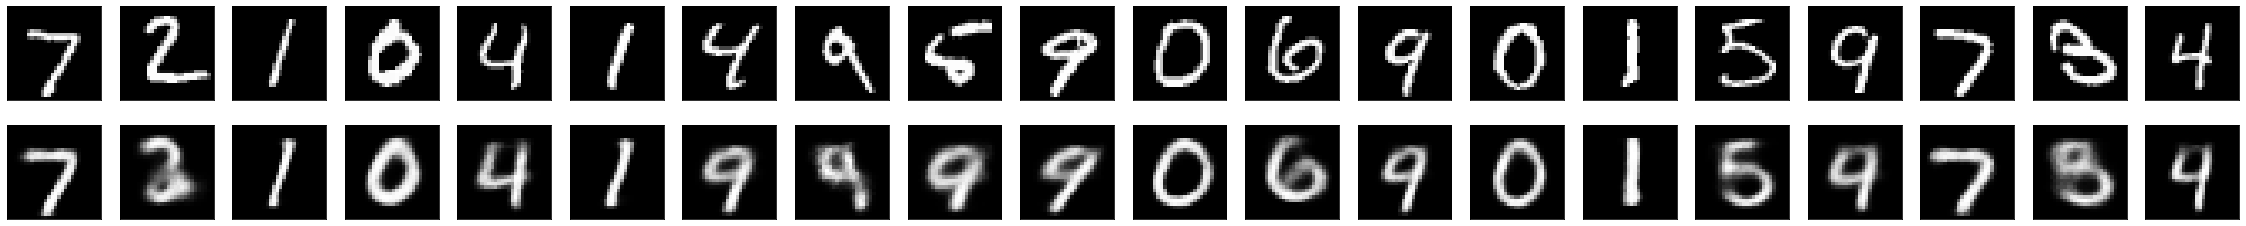

In [5]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
encoded_imgs

In [ ]:
%matplotlib inline

In [ ]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,0], s=1, c=ytest, cmap='rainbow')
# plt.show()

In [ ]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,3], s=1, c=ytest, cmap='rainbow')
# plt.show()

In [ ]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,2], s=1, c=ytest, cmap='rainbow')
# plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(encoded_imgs[:,1], encoded_imgs[:,2], encoded_imgs[:,3], c=ytest, cmap='rainbow', s=1)

# Assignment
1. change the `encoding_dim` through various values (`range(2,18,2)` and store or keep track of the best loss you can get. Plot the 8 pairs of dimensions vs loss on a scatter plot
2. using the previous assignment's model of detecting images, how does the accuracy change when you run the digit-prediction model on these 'decoded' values?
3. apply noise to *_only_* the input of the autoencoder (not the output). demonstrate that your autoencoder can strip out noise.